# Download dataset

In [1]:
URL = "http://www.juergenbrauer.org/datasets/0003_used_cars_autoscout24.csv"

import urllib.request
urllib.request.urlretrieve(URL, "used_cars_autoscout24.csv")

('used_cars_autoscout24.csv', <http.client.HTTPMessage at 0x76124845f980>)

# Read in dataset

In [2]:
import pandas
df = pandas.read_csv("used_cars_autoscout24.csv")
df = df.drop('Unnamed: 0', axis="columns")
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [3]:
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

# Check data quality

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  o

In [5]:
df.shape

(251079, 14)

In [6]:
df.describe()

,mileage_in_km
count,2.509270e+05
mean,8.534002e+04
std,7.871706e+04
min,0.000000e+00
25%,2.490400e+04
50%,6.750000e+04
75%,1.265000e+05
max,3.800000e+06


# Toy example: Cleaning columns with strings

In [7]:
d = {"A" : [10,20,30,40],
     "B" : [100,200,"hey guys!",400]}
import pandas
df_test = pandas.DataFrame( d )
df_test

,A,B
0,10,100
1,20,200
2,30,hey guys!
3,40,400


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      int64 
 1   B       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [9]:
df_test["B"]

0          100
1          200
2    hey guys!
3          400
Name: B, dtype: object

In [10]:
df_test["B"] = pandas.to_numeric( df_test["B"], errors="coerce" )
df_test

,A,B
0,10,100.0
1,20,200.0
2,30,NaN
3,40,400.0


In [11]:
df_test.dropna()

,A,B
0,10,100.0
1,20,200.0
3,40,400.0


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      int64  
 1   B       3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 196.0 bytes


# Cleaning several numerical columns

In [13]:
import pandas
df = pandas.read_csv("used_cars_autoscout24.csv")
df = df.drop( ['Unnamed: 0', 'power_kw'], axis="columns")

# these numerical columns contain strings, which is NOT correct!
numeric_feature_cols = ["price_in_euro",
                        "year",
                        "power_ps"]

for col in numeric_feature_cols:    
    df[col] = pandas.to_numeric( df[col], errors="coerce" )

# drop all rows with missing values
df = df.dropna()
df

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995.0,1300.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995.0,4900.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996.0,17950.0,179.0,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996.0,7900.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996.0,3500.0,150.0,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251071,volvo,Volvo XC60,silver,04/2023,2023.0,81350.0,310.0,Automatic,Hybrid,"7,4 l/100 km",167 g/km,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
251072,volvo,Volvo XC60,silver,05/2023,2023.0,55400.0,197.0,Automatic,Diesel,"5,6 l/100 km",142 g/km,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
251073,volvo,Volvo XC60,silver,03/2023,2023.0,54500.0,197.0,Automatic,Diesel,"5,6 l/100 km",142 g/km,5900.0,B4 Autom. Plus Dark Sitzhzg.
251075,volvo,Volvo XC90,white,03/2023,2023.0,89690.0,235.0,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223733 entries, 0 to 251076
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     223733 non-null  object 
 1   model                     223733 non-null  object 
 2   color                     223733 non-null  object 
 3   registration_date         223733 non-null  object 
 4   year                      223733 non-null  float64
 5   price_in_euro             223733 non-null  float64
 6   power_ps                  223733 non-null  float64
 7   transmission_type         223733 non-null  object 
 8   fuel_type                 223733 non-null  object 
 9   fuel_consumption_l_100km  223733 non-null  object 
 10  fuel_consumption_g_km     223733 non-null  object 
 11  mileage_in_km             223733 non-null  float64
 12  offer_description         223733 non-null  object 
dtypes: float64(4), object(9)
memory usage: 23.9+ MB


# Toy example: Encoding of categorial column data

In [15]:
d = {"mileage" : [55000,12000,100000,9300],
     "color"    : ["red", "green", "yellow", "red"]}
df_test = pandas.DataFrame(d)
df_test

,mileage,color
0,55000,red
1,12000,green
2,100000,yellow
3,9300,red


In [16]:
# "Dummy-Encoding" or "One-Hot-(Dummy-)Encoding"
df_test_ohe = pandas.get_dummies(df_test, dtype=int)
df_test_ohe

,mileage,color_green,color_red,color_yellow
0,55000,0,1,0
1,12000,1,0,0
2,100000,0,0,1
3,9300,0,1,0


In [17]:
df_test_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mileage       4 non-null      int64
 1   color_green   4 non-null      int64
 2   color_red     4 non-null      int64
 3   color_yellow  4 non-null      int64
dtypes: int64(4)
memory usage: 260.0 bytes


# Prepare data for Machine Learning

## Define inputs & outputs for the model

In [18]:
x = df[ ["year", "power_ps", "mileage_in_km"] ]
y = df[ ["price_in_euro"] ]

In [19]:
x.shape

(223733, 3)

In [20]:
y.shape

(223733, 1)

## Train-Test-Split

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x_train.shape

(178986, 3)

In [23]:
y_train.shape

(178986, 1)

In [24]:
x_test.shape

(44747, 3)

In [25]:
y_test.shape

(44747, 1)

## Scale data

In [26]:
d = {"A" : [-10,0,10,5,0,-5],
     "B" : [0,-2000,+2000,0,0,1000]}
df_test = pandas.DataFrame(d)
df_test

,A,B
0,-10,0
1,0,-2000
2,10,2000
3,5,0
4,0,0
5,-5,1000


In [27]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s.fit(df_test)
scaled_data = s.transform(df_test)
scaled_data

array([[0.  , 0.5 ],
       [0.5 , 0.  ],
       [1.  , 1.  ],
       [0.75, 0.5 ],
       [0.5 , 0.5 ],
       [0.25, 0.75]])

In [28]:
from sklearn.preprocessing import MinMaxScaler

s_input = MinMaxScaler()
s_output = MinMaxScaler()

s_input.fit(x_train)
s_output.fit(y_train)

x_train_scaled = s_input.transform(x_train)
y_train_scaled = s_output.transform(y_train)

In [29]:
x_train_scaled

array([[3.57142857e-01, 1.83652876e-01, 4.98684211e-02],
       [9.28571429e-01, 1.02926337e-01, 1.31578947e-05],
       [8.92857143e-01, 1.18062563e-01, 6.06368421e-03],
       ...,
       [7.85714286e-01, 1.29162462e-01, 1.63157895e-02],
       [6.42857143e-01, 3.95560040e-01, 2.26315789e-02],
       [1.00000000e+00, 1.33198789e-01, 2.63157895e-06]])

In [30]:
x_train

,year,power_ps,mileage_in_km
105569,2005.0,190.0,189500.0
243412,2021.0,110.0,50.0
71493,2020.0,125.0,23042.0
161560,2019.0,131.0,81565.0
3717,2008.0,179.0,200000.0
...,...,...,...
134958,2013.0,190.0,299000.0
116503,2015.0,136.0,95393.0
148146,2017.0,136.0,62000.0
165147,2013.0,400.0,86000.0


# Using categorial column data

In [31]:
df.head(3)

,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995.0,1300.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995.0,4900.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996.0,17950.0,179.0,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [32]:
df["brand"].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [33]:
df["brand"].nunique()

47

In [34]:
df["model"].nunique()

1226

In [35]:
df["color"].unique()

array(['red', 'black', 'silver', 'grey', 'white', 'beige', 'blue',
       'green', 'yellow', 'gold', 'brown', 'bronze', 'violet', 'orange'],
      dtype=object)

In [36]:
df["color"].nunique()

14

In [37]:
df["transmission_type"].unique()

array(['Manual', 'Automatic', 'Semi-automatic', 'Unknown'], dtype=object)

# All in one script

Input features: Index(['year', 'power_ps', 'mileage_in_km', 'brand', 'model', 'color',
       'transmission_type', 'fuel_type'],
      dtype='object')
Outputs       : Index(['price_in_euro'], dtype='object')
Training started ...
Training finished!


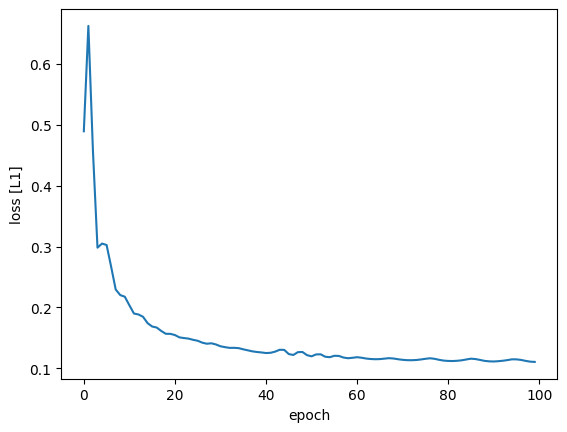

MAE computed with NumPy: 3494.7
MAE computed with scikit-learn: 3494.7
MAPE computed with NumPy: 16.5
MAPE computed with scikit-learn: 16.5


In [38]:
# 1. Read in data
import pandas
df = pandas.read_csv("used_cars_autoscout24.csv")
df = df.sample(frac=1.0)

# 2. Drop columns not needed
df = df.drop( ['Unnamed: 0', 'power_kw'], axis="columns")

# 3. Data Cleaning: Numerical columns with strings
numeric_feature_cols = ["price_in_euro",
                        "year",
                        "power_ps"]                        
for col in numeric_feature_cols:    
    df[col] = pandas.to_numeric( df[col], errors="coerce" )

# 4. Data Cleaning: Drop rows with missing data
df = df.dropna()

# Remove outlier
df = df.query("mileage_in_km<1e6 and price_in_euro<1e6")

# 5. Define inputs/outputs
x = df[ ["year", "power_ps", "mileage_in_km", "brand", "model", "color", "transmission_type", "fuel_type"] ]
y = df[ ["price_in_euro"] ]
print("Input features:", x.columns)
print("Outputs       :", y.columns)

# 6. One-Hot-Dummy-Encoding
x = pandas.get_dummies(x)


# 7. Train-/Test-Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 8. Scale data
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
s_input = StandardScaler()
s_output = StandardScaler()
s_input.fit(x_train)
s_output.fit(y_train)
x_train_scaled = s_input.transform(x_train)
y_train_scaled = s_output.transform(y_train)
x_test_scaled = s_input.transform(x_test)
y_test_scaled = s_output.transform(y_test)

# 9. NumPy Arrays --> PyTorch Tensors
import torch
X_train_scaled = torch.FloatTensor(x_train_scaled)
Y_train_scaled = torch.FloatTensor(y_train_scaled)
X_test_scaled = torch.FloatTensor(x_test_scaled)
Y_test_scaled = torch.FloatTensor(y_test_scaled)

# 10. Define neural network model
import torch.nn as nn
import torch.optim as optim

class MLPRegressor(nn.Module):

    def __init__(self, nr_inputs, nr_hidden_neurons, nr_outputs):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(nr_inputs, nr_hidden_neurons),
            nn.ReLU(),
            nn.Linear(nr_hidden_neurons,nr_outputs)
        )

    def forward(self, x):
        return self.layers(x)

NR_INPUTS = x_train.shape[-1]
NR_OUTPUTS = y_train.shape[-1]
model = MLPRegressor(NR_INPUTS, 100, NR_OUTPUTS)
#loss_fn = nn.MSELoss()
loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 11. Train model
print("Training started ...")
losses = []
for epoch in range(100):

    model.train()

    # Forward-Step
    pred = model(X_train_scaled)
    loss = loss_fn(pred, Y_train_scaled)

    # Backward-Step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append( loss.item() )
print("Training finished!")


# 12. Show learning curve
import matplotlib.pyplot as plt
plt.plot( losses )
plt.xlabel("epoch")
plt.ylabel("loss [L1]")
plt.show()


# 13. Evaluate model
model.eval()
with torch.no_grad():
    pred_test_scaled = model(X_test_scaled)
pred_test = s_output.inverse_transform(pred_test_scaled)

preds_vec = pred_test.flatten()
gt_vec = y_test.values.flatten()

import numpy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#        MEAN    ABS       ERROR
MAE = numpy.mean(abs(preds_vec - gt_vec))
print(f"MAE computed with NumPy: {MAE:.1f}")
print(f"MAE computed with scikit-learn: {mean_absolute_error(gt_vec, preds_vec):.1f}")

#        MEAN    ABS   PERCENTAGE ERROR
MAPE = numpy.mean(abs( 100*(preds_vec - gt_vec)/gt_vec))
print(f"MAPE computed with NumPy: {MAPE:.1f}")
print(f"MAPE computed with scikit-learn: {100*mean_absolute_percentage_error(gt_vec, preds_vec):.1f}")

In [39]:
x

,year,power_ps,mileage_in_km,brand_alfa-romeo,brand_aston-martin,brand_audi,brand_bentley,brand_bmw,brand_cadillac,brand_chevrolet,...,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Ethanol,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Other,fuel_type_Petrol,fuel_type_Unknown
102020,2023.0,92.0,8.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
126867,2021.0,197.0,22867.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11826,2016.0,272.0,130000.0,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
157300,2023.0,83.0,5000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
238897,2019.0,190.0,94666.0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56062,2022.0,150.0,7500.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
18031,2019.0,190.0,158500.0,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
110113,2010.0,170.0,250000.0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
145142,2015.0,87.0,34330.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
